Dhea Gita (H071201030)

# <font color = '#008080'>Algoritma Klasifikasi</font>

### <font color = '#808080'>Informasi Data</font>
Dataset mencakup 244 contoh yang mengelompokkan kembali data dari dua wilayah Aljazair, yaitu wilayah Bejaia yang terletak di timur laut Aljazair dan wilayah Sidi Bel-abbes yang terletak di barat laut Aljazair.

122 instansi untuk setiap wilayah. Periode dari Juni 2012 hingga September 2012. Dataset mencakup 11 atribut dan 1 output atribut *(class)*. 244 instansi telah diklasifikasikan ke dalam kelas `fire` (138 class) dan `non fire` (106 class).


### <font color = '#808080'>Informasi Atribut</font>
* **Date -** (DD/MM/YYYY) tanggal, bulan (juni-september), tahun (2012) 

*Pengamatan Data Cuaca*
* **Temp -** suhu siang (suhu max) dalam derajat Celcius (22-24)
* **RH -** Relative Humidity (kelembaban relatif) dalam `%` (21-90)
* **Ws -** Wind speed (kecepatan angin) dalam km/jam (6-29)
* **Rain -** total hari dalam mm (0-16.8) 

*Komponen FWI*
* **FFMC (Fine Fuel Moisture Code) -** mengukur kondisi kebakaran pada awal musim kebakaran ketika bahan bakar masih sangat kering, index dari sistem FWI (28.6-92.5)
* **DMC (Duff Moisture Code) -**  peringkat numerik dari kelembaban rata-rata dari lapisan tanah organik yang tidak padat dengan kedalaman sedang, index dari sistem FWI (7-220.4)
* **DC (Drought Code) -**,  peringkat numerik kandungan kadar air di lapisan organik yang berada 10-20 cm di bawah permukaan tanah, index dari sistem FWI (7-220.4)
* **ISI (Initial Spread Index) -** mengukur kondisi kebakaran pada awal musim kebakaran ketika bahan bakar masih sangat kering, index dari sistem FWI (0-18.5)
* **BUI (Build Up Index) -** mengukur kondisi kebakaran di pertengahan hingga akhir musim kebakaran, index dari sistem FWI (0-31.1)
* **FWI (Fire Weather Index) -** index FWI (0-31.1)
* **Classes -** dua kelas `fire` dan `non fire`

    
### <font color = '#808080'>Goal</font>
Tujuan pojek ini adalah untuk mendeteksi munculnya api yang akan diklasifikasikan ke dalam class `fire` dan `non fire`, berdasarkan pengamatan data cuaca.


### <font color = '#808080'>Objektif</font>
* Part 1: Read Data
* Part 2: Split Dataset
* Part 3: Machine Learning
* Part 4: Pengujian Metode
* Part 5: Kesimpulan


### <font color = '#808080'>Sumber Data</font>
https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++


### <font color = '#808080'>Yang Diperlukan</font>
* Python library: `pandas`, `numpy`, `matplotlib`, `scikit-learn`
* Datafiles: `Algerian_forest_fires_dataset_UPDATE.csv`

## Part 1: Read Data

In [1]:
import pandas as pd
import numpy as np

Dalam satu file yang didownload dari UCI memiliki dua jenis dataset dari region yang berbeda yaitu `Bejaia` dan `Sidi-Bel Abbes`. Oleh karena itu, dengan cara manual ini dimodifikasi menggunakan aplikasi Microsoft Excel untuk memisahkan kedua dataset tersebut.

In [2]:
header = ['day', 'month', 'year', 
          'Temp', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 
          'ISI', 'BUI', 'FWI', 'Classes']

In [3]:
df_bejaia = pd.read_csv('Data/Algerian_forest_fires_dataset_Bejaia Region.csv', header=None)
df_bejaia.columns = header
df_bejaia.head()

,day,month,year,Temp,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
df_sidi = pd.read_csv('Data/Algerian_forest_fires_dataset_Sidi-Bel Abbes Region.csv', header=None)
df_sidi.columns = header
df_sidi.head()

,day,month,year,Temp,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


Pada bagian ini, masing-masing dataset akan ditambahkan 1 kolom baru yang merepresentasikan region dataset dengan tipedata numerik.

* Bejaia = 0
* Sidi-Bel = 1

In [5]:
df_bejaia['region'] = 0
df_sidi['region'] = 1

In [6]:
frames = [df_bejaia, df_sidi] 
df = pd.concat(frames).reset_index(drop=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   day      244 non-null    int64  
 1   month    244 non-null    int64  
 2   year     244 non-null    int64  
 3   Temp     244 non-null    int64  
 4   RH       244 non-null    int64  
 5   Ws       244 non-null    int64  
 6   Rain     244 non-null    float64
 7   FFMC     244 non-null    float64
 8   DMC      244 non-null    float64
 9   DC       244 non-null    float64
 10  ISI      244 non-null    float64
 11  BUI      244 non-null    float64
 12  FWI      244 non-null    float64
 13  Classes  244 non-null    object 
 14  region   244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB


In [8]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [9]:
# menghapus extra space data
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [10]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

Dari info di atas, ternyata kolom Classes masih bertipe objek. Agar data dapat diproses dalam model, data kolom ini akan diubah ke numerik menggunakan LabelEncoder, dimana
* `fire` = 0
* `not fire` = 1

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Classes'] = le.fit_transform(df['Classes'])

In [12]:
df.head()

,day,month,year,Temp,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [13]:
# mengecek nilai null
df.isna().sum()

day        0
month      0
year       0
Temp       0
RH         0
Ws         0
Rain       0
FFMC       0
DMC        0
DC         0
ISI        0
BUI        0
FWI        0
Classes    0
region     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   day      244 non-null    int64  
 1   month    244 non-null    int64  
 2   year     244 non-null    int64  
 3   Temp     244 non-null    int64  
 4   RH       244 non-null    int64  
 5   Ws       244 non-null    int64  
 6   Rain     244 non-null    float64
 7   FFMC     244 non-null    float64
 8   DMC      244 non-null    float64
 9   DC       244 non-null    float64
 10  ISI      244 non-null    float64
 11  BUI      244 non-null    float64
 12  FWI      244 non-null    float64
 13  Classes  244 non-null    int32  
 14  region   244 non-null    int64  
dtypes: float64(7), int32(1), int64(7)
memory usage: 27.8 KB


In [15]:
# hitung matriks korelasi
corr_matrix = df.corr()
# identifikasi fitur yang memiliki korelasi tinggi dengan target 'Classes'
corr_target = abs(corr_matrix["Classes"])
relevant_features = corr_target[corr_target > 0.5]
relevant_features

Temp       0.518119
FFMC       0.770114
DMC        0.584188
DC         0.507122
ISI        0.736142
BUI        0.584545
FWI        0.719407
Classes    1.000000
Name: Classes, dtype: float64

In [16]:
X = df[relevant_features.index]
y = df['Classes']

In [17]:
df['Classes'].unique()

array([1, 0])

Matriks korelasi di atas dihitung menggunakan metode `corr()` dan fitur-fitur dengan korelasi tinggi dipilih berdasarkan nilai ambang 0.5. Fitur-fitur ini kemudian ditambahkan ke dalam dataframe baru selected_features untuk diproses lebih lanjut.

## Part 2: Split Dataset

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Part 3: Machine Learning

#### 1. KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

k = 2
knn = KNeighborsClassifier(n_neighbors=k)
knn_method = KNeighborsClassifier()

knn_method.fit(X_train, y_train)
knn_predic = knn_method.predict(X_test)

accuracy_knn = metrics.accuracy_score(knn_predic, y_test)

print('Akurasi metode KNN:', round(accuracy_knn,4), ' atau ', round(accuracy_knn*100,2), '%', sep='')

Akurasi metode KNN:0.9595 atau 95.95%


#### 2. Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

tree_method = DecisionTreeClassifier()
tree_method.fit(X_train, y_train)
tree_predic = tree_method.predict(X_test)

accuracy_tree = metrics.accuracy_score(tree_predic, y_test)

print('Akurasi metode Tree:', round(accuracy_tree,8), ' atau ', round(accuracy_tree*100,2), '%', sep='')

Akurasi metode Tree:1.0 atau 100.0%


#### 3. Naive Bayes

In [36]:
from sklearn import naive_bayes
import sklearn.metrics as metrics

bayes_method = naive_bayes.BernoulliNB()
bayes_method.fit(X_train, y_train)
bayes_predic = bayes_method.predict(X_test)

accuracy_bayes = metrics.accuracy_score(bayes_predic, y_test)

print('Akurasi metode Bayes:', round(accuracy_bayes,8), ' atau ', round(accuracy_bayes*100,2), '%', sep='')

Akurasi metode Bayes:1.0 atau 100.0%


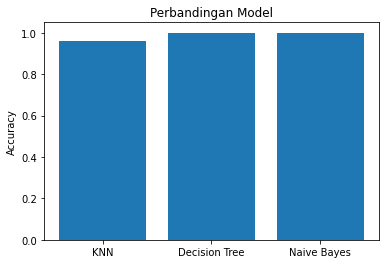

In [37]:
import matplotlib.pyplot as plt

models = ['KNN', 'Decision Tree', 'Naive Bayes']
accuracies = [accuracy_knn, accuracy_tree, accuracy_bayes]
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Perbandingan Model')
plt.show()

## Part 4: Pengujian Metode

#### 1. KNN

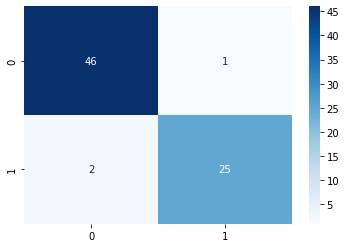

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_knn = confusion_matrix(y_test, knn_predic)

sns.heatmap(cm_knn, annot=True, cmap='Blues')
plt.show()

#### 2. Decision Tree

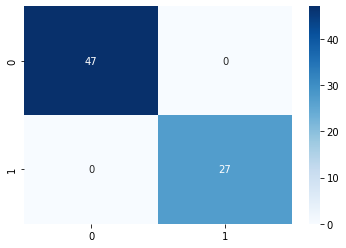

In [23]:
cm_tree = confusion_matrix(y_test, tree_predic)

sns.heatmap(cm_tree, annot=True, cmap='Blues')
plt.show()

#### 3. Naive Bayes

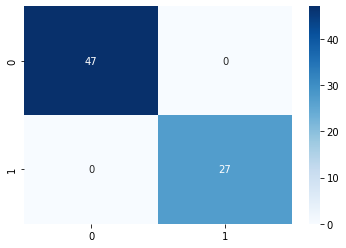

In [24]:
cm_bayes = confusion_matrix(y_test, bayes_predic)

sns.heatmap(cm_bayes, annot=True, cmap='Blues')
plt.show()

In [38]:
df.shape

(244, 15)

## Part 5: Kesimpulan

Setelah melakukan preprocessing data, ditemukan bahwa: 
* Data memiliki 244 baris dan 15 kolom, dan kolom `Classes` adalah target prediksi.
* Data diubah ke numerik menggunakan `encoding` untuk dapat menghitung nilai akurasi hasil prediksi.

Berdasarkan hasil preprocessing antara model KNN, Decision Tree, dan Naive Bayes, dapat ditarik kesimpulan bahwa hasil prediksi menggunakan model Decision Tree dan Naive Bayes memiliki akurasi yang sempurna yaitu 100%, sedangkan algoritma KNN hanya sekitar 95%. Namun, model yang memilki akurasi 100% pada data tidak selalu berkualitas baik karena kemungkinan telah mengalami overfitting.